In [15]:
from snntoolbox.bin.run import run_toolbox

In [16]:
config = """[paths]
dataset_path = %(path_wd)s/../../../datasets/mnist
filename_ann = trained_model_of_lenet_300_100_relu_crossent_noisy_sgd_retest_final_dense
runlabel = lenet_dense

[tools]
evaluate_ann = False
normalize = False
 
[simulation]
simulator = spiNNaker
duration = 1000
num_to_test = 10
batch_size = 1
keras_backend = tensorflow

[cell]
tau_syn_E = 0.2
tau_syn_I = 0.2
v_thresh = 1

[input]
poisson_input = True

[output]
log_vars = {'all'}
plot_vars = {'all'}"""

In [17]:
file='config'
with open(file, 'w') as filetowrite:
    filetowrite.write(config)

f = open("config","r")
print(f.read())

[paths]
dataset_path = %(path_wd)s/../../../datasets/mnist
filename_ann = trained_model_of_lenet_300_100_relu_crossent_noisy_sgd_retest_final_dense
runlabel = test_with_cell_params

[tools]
evaluate_ann = False
normalize = False
 
[simulation]
simulator = spiNNaker
duration = 1000
num_to_test = 10
batch_size = 1
keras_backend = tensorflow

[cell]
tau_syn_E = 0.2
tau_syn_I = 0.2
v_thresh = 1

[input]
poisson_input = True

[output]
log_vars = {'all'}
plot_vars = {'all'}


In [14]:
run_toolbox(config_filepath='config',terminal=True)

Using TensorFlow backend.



SNN toolbox WARNING: Delay (0.0) must be at least one time step (1.0). Setting delay = dt.

SNN toolbox WARNING: For optimal correspondence between the original ANN and the converted SNN simulated on pyNN, the threshold should be 0.01. Current value: 1.0.
Instructions for updating:
Colocations handled automatically by placer.
Initializing spiNNaker simulator...



2019-09-27 17:43:46 INFO: Read cfg files: /mnt/snntoolbox/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /mnt/snntoolbox/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /localhome/mbaxsej2/.spynnaker.cfg
2019-09-27 17:43:46 INFO: Will search these locations for binaries: /mnt/snntoolbox/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /mnt/snntoolbox/sPyNNaker/spynnaker/pyNN/model_binaries
2019-09-27 17:43:46 WARNING: /mnt/snntoolbox/snn_toolbox_private/examples/models/test_examples/lenet_dense/reports has 14 old reports that have not been closed
2019-09-27 17:43:46 WARNING: /mnt/snntoolbox/snn_toolbox_private/examples/models/test_examples/lenet_dense/application_generated_data_files has 14 old reports that have not been closed
2019-09-27 17:43:46 INFO: Setting time scale factor to 100.
2019-09-27 17:43:46 INFO: Setting machine time step to 1000 micro-seconds.


Detected PyNN version 0.9.4 and Neo version 0.7.2
['/mnt/snntoolbox/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/mnt/snntoolbox/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/localhome/mbaxsej2/.spynnaker.cfg']
Loading data set from '.npz' files in /mnt/snntoolbox/snn_toolbox_private/examples/datasets/mnist.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (10, 1, 300)              235500    
_________________________________________________________________
dense_2 (Dense)              (10, 1, 100)              30100     
_________________________________________________________________
flatten_1 (Flatten)          (10, 100)                 0         
_________________________________________________________________
dense_3 (Dense)              (10, 10)                  1010      
Total params: 266,610
Trainable params: 266,610
Non

2019-09-27 17:43:47 INFO: Increasing spike rate while recording requires a "reset unless additional_parameters "max_rate" is set


Compiling parsed model...

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (1, 1, 784)               0         
_________________________________________________________________
00Dense_1x300 (Dense)        (1, 1, 300)               235500    
_________________________________________________________________
01Dense_1x100 (Dense)        (1, 1, 100)               30100     
_________________________________________________________________
02Flatten_100 (Flatten)      (1, 100)                  0         
_________________________________________________________________
03Dense_10 (Dense)           (1, 10)                   1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Building spiking model...
Instantiating layer: 00Dense_1x300
Building layer: 00Dense_1x300
I

AxisError: axis 1 is out of bounds for array of dimension 1

In [13]:
args = {'model':'lenet_dense_serialised', '--t_stim': 1000, '--testing_examples':10, 'result_dir':'.'}
import pynn_object_serialisation.experiments.mnist_testing.mnist_testing as mnist_testing
mnist_testing.run(args)


AttributeError: 'dict' object has no attribute 'result_dir'

In [20]:
from pynn_object_serialisation.OutputDataProcessor import OutputDataProcessor

In [40]:
output = OutputDataProcessor('lenet_dense/results/mnist_results__172233_27092019.npz')

In [41]:
output.layer_names

['InputLayer', '00Dense_1x300', '01Dense_1x100', '03Dense_10']

In [42]:
output.y_test.shape

(10,)

In [43]:
output.y_pred

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255], dtype=uint8)

In [44]:
output.accuracy

0.0

In [45]:
output.y_pred == output.y_test

array([False, False, False, False, False, False, False, False, False,
       False])

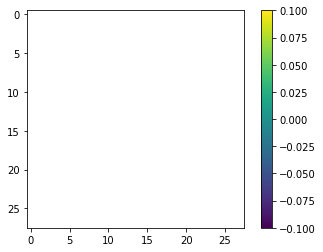

In [51]:
output.plot_bin(1, output.layer_names[3], shape = (28,28))

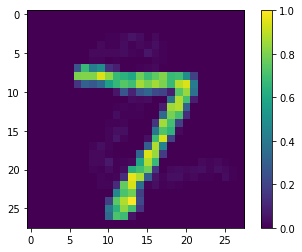

In [48]:
output.plot_bin(0, output.layer_names[0], shape = (28,28))

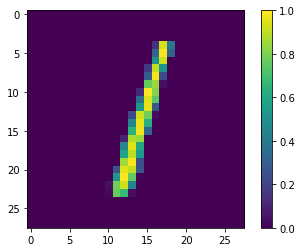

In [34]:
output.plot_bin(2, output.layer_names[0], shape = (28,28))

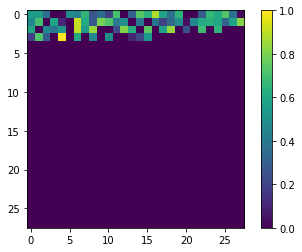

In [35]:
output.plot_bin(5, output.layer_names[2], shape = (28,28))